# Python Tutorial 3 - Pandas, matplotlib, networkx and twarc


## Import

Before we start with todays tutorial, let us talk a little bit about **modules** and what they represent. Imagine you are working on a script which includes a variety of functions to solve common tasks, for instance: functions to perform mathematical matrix operations or functions to visualise huge amounts of data. Wouldn't it be convenient if we could use those functions in another python-script? Well....since we are too lazy to rewrite everything.... Yeah, it would!

Modules - it's your time to shine🌞<br>
Modules are nothing more than <ins>.py-files</ins> consisting of different kinds of components, i.e. functions, which can be made available in any other python-script using the `import`-statement. And yes, you can import your own python-scripts as well! Besides that, Python comes with a extensive amount of modules, known as <ins>Standard-Library</ins>. You can also include 3rd-party packages (numpy, pandas, scipy, matplotlib,...) but you will have to install them first. 

To keep the <ins>namespace</ins> clean (and your brain sane), lets have a look on how to use `import`.
### How to `import` everything from a module

**Python-Syntax:** 
```python
import module_name
```

It doesn't get easier than that - after the import-statement follows the name of the module. Now you can use all functions from the `pandas` module by prefixing their name with their <ins>namespace</ins> `pandas.` Usually, all import-statements are found at the top of the script to keep the code tidy and clear.



### How to `import` specific contents `from` a module

**Python-Syntax:**
```python
from module_name import content_name1, content_name2, etc
``` 

Instead of importing everything of a module, we can extract specific contents, i.e. only functions we really need. This allows us, to use functions without the namespace-prefix. Keep in mind, that multiple contents are separated with commas (`,`).

**Pitfall:**
```python
from statistics import mean
from numpy import mean
```
Always keep an eye on which elements you are importing from different modules. In our case, there are two imported functions with the same name (name-collision). Therefore python always uses the last imported function with that name - in our case, the mean-function of the numpy module. <ins>The last import always wins!</ins>



### How to `import` a module `as` you like

**Python-Syntax:** 
```python
import module_name as new_module_name_in_namespace
from module_name import component as new_component_name_in_namespace
```

Modules and packages can be renamed on import to keep code more succinct. Most widely-used packages have an established abbreviation. Stick to it to make your code readable for others! For example pandas established abbrevation is `pd` so you would import it as:
```python
import pandas as pd
```

### `Import`ant Information
Usually, standard-library-/3rd-party-modules do contain encapsulated structures like functions/objects/... which need to be explicitly accessed for execution. This means, that all contents outside those structures will be immediatelly executed at module-import. 

If a module (especially your self-made one) has changed while loaded in Jupyter, the imported functions do not update automatically. To force reimporting on every execution, place and execute the two lines below in your .ipynb-file:
```python
%load_ext autoreload
%autoreload 2
```

## PIP - Installing Python Modules
https://docs.python.org/3/installing/index.html

While the python standard library is *extensive*, there is an even bigger collection of 3rd-party packages available. `pip` is one of several possibilities to install such additional python packages. It comes with the default python setup, so you can use it right away. Note that pip is a package itself, but is usually used as a command line tool, not within a `.py`-script or `.ipynb`-notebook. You most likely already used pip when installing JupyterLab. Replace `pip` with `pip3` in the following commands, if you are using MACOS or Linux.

To install a package with pip, simply open up a terminal and enter
> `pip install <package name>`

e.g.
> `pip install numpy`.

Multiple packages can be installed at once by just chaining names (separated with spaces) like this:
> `pip install numpy matplotlib pandas scipy`

Depending on your computer's settings and environment setup, you might run into permission issues. Usually installing new packages just for the current user (instead of the systemwide default) fixes those:
> `pip install --user numpy`

Just like python itself, its packages exist in different versions, having different features and dependencies. This often leads to issues when trying to run code one another computer. Best practice would be to create a *virtual environment* ([Docs](https://packaging.python.org/tutorials/installing-packages/#creating-virtual-environments)) for each project, using *requirements files* ([Docs](https://pip.pypa.io/en/latest/user_guide/#requirements-files)) - or using Docker containers. You are welcome to do so, but for now it's sufficient to just install packages globally ;)


<center><img src="https://hackernoon.com/hn-images/1*ookfwogTLx_1qhHaiFJoJw.png" width="400" /></center>

# Pandas

Pandas is a Python package, which provides data structures for working with tabular, labeled data (i.e., data in a table with rows and columns). It is a good tool for real-world data analysis in Python. [Here](https://pandas.pydata.org/docs/) is the documentation of pandas.

[Here](https://www.youtube.com/playlist?list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS) is an extensive playlist covering all basic pandas operations. The skills required for this exercise are covered in Parts 1 to 6. Feel free to skip around, as the videos cover lots of details :)

#### Install and Import

In order to get access to the Pandas module, we’ll need to install it: ```pip install pandas ``` (in commandline/terminal)  
Or you can execute following cell:

In [1]:
! pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


The module is usually imported at the top of a file under pd.

In [2]:
import pandas as pd
from datetime import date # This is needed later for some date calculations

#### Pandas Data structures

Pandas has it's own data structures - ```Series ``` and ``` DataFrames ```.

```pd.Series ```: One-dimensional array with axis labels   
bsp. ```x = pd.Series([6,3,4,6], index=[‘a’, ‘b’, ‘c’, ‘d’]) ```   
This data type is not so important for our usecases in this class.


```pd.DataFrames ```: DataFrames can contain many different data types: strings, ints, floats, tuples, ...   
They have **rows** and **columns**: Every column has a name/header, every row has an index (integer) and contains values (different data types). So it is very nice to work with a lot of data with a lot of different columns, because they are named.  

#### CSV reading and writing with Pandas
The most important methods are `.to_csv` and `pd.read_csv`. But what are the methods doing?

`.to_csv`: saves pd.DataFrame, pd.Series... as an .csv file

`pd.read_csv`: loads the .csv-file in a pd.DataFrame

In [3]:
most_streamed_songs = pd.read_csv('most_streamed_songs.csv') #load data to Pandas DataFrame
# do something with the DataFrame
most_streamed_songs.to_csv('./updated_most_streamed_songs.csv', index = False) #save data to a CSV

#### Create a DataFrame

Let´s try to pass a dictionary to pd.DataFrame():

In [4]:
most_streamed_songs = {"songs": ["Shape of You","Blinding Lights", "Dance Monkey", "Rockstar", "One Dance"],
                       "artist": ["Ed Sheeran","The Weeknd", "Tones and I", "Post Malone", "Drake"],
                       "album": ["Divide","After Hours","The Kids Are Coming", "Beerbongs & Bentleys", "Views"],
                       "streams_in_millions": [2.960, 2.613, 2.395, 2.291, 2.160],
                       "publish_year": [2017, 2019, 2019, 2017, 2016]}

most_streamed_songs = pd.DataFrame(most_streamed_songs)
display(most_streamed_songs) #this works only in jupyter

,songs,artist,album,streams_in_millions,publish_year
0,Shape of You,Ed Sheeran,Divide,2.960,2017
1,Blinding Lights,The Weeknd,After Hours,2.613,2019
2,Dance Monkey,Tones and I,The Kids Are Coming,2.395,2019
3,Rockstar,Post Malone,Beerbongs & Bentleys,2.291,2017
4,One Dance,Drake,Views,2.160,2016


It is also possible to take lists and use the keyword argument *columns* to pass a list of column names:

In [5]:
most_streamed_songs = [["Shape of You", "Ed Sheeran", "Divide", 2.960, 2017],
                       ["Blinding Lights","The Weeknd","After Hours",2.613,2019],
                       ["Dance Monkey", "Tones and I", "The Kids Are Coming", 2.395, 2019],
                       ["Rockstar", "Post Malone", "Beerbongs & Bentleys", 2.291, 2017],
                       ["One Dance", "Drake", "Views", 2.160, 2016]]
                       
most_streamed_songs = pd.DataFrame(most_streamed_songs, columns =  ["songs", "artist", "album", "streams_in_millions", "publish_year"])
display(most_streamed_songs)  #this works only in jupyter

,songs,artist,album,streams_in_millions,publish_year
0,Shape of You,Ed Sheeran,Divide,2.960,2017
1,Blinding Lights,The Weeknd,After Hours,2.613,2019
2,Dance Monkey,Tones and I,The Kids Are Coming,2.395,2019
3,Rockstar,Post Malone,Beerbongs & Bentleys,2.291,2017
4,One Dance,Drake,Views,2.160,2016


#### Working with DataFrames

Now, we want to work with a DataFrame. Therefore, we need to import a module we wrote before:

In [6]:
%load_ext autoreload
%autoreload 2 

In [7]:
def get_covid_data(loc = ["Austria", "Italy", "Germany"], 
             cols = ["iso_code", "location", "date", "total_cases", "new_cases", "total_deaths", "new_deaths", "population"],
             start_date = "2021-11-04"):

    data_original = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
    data = data_original.copy()
    data = data[data.location.isin(loc)]
    data = data.loc[(data.date >= start_date) & (data.date <= str(date.today()))][cols]
    #data.to_csv(f'COVID-19_AUT_GER_IT_{"_".join(start_date.split("-"))}_TO_{"_".join(str(date.today()).split("-"))}.csv')
    return data.reset_index(drop = True)

In [8]:
data = get_covid_data() # have a look at the code of get_data -  the variable data is now a pd.DataFrame
data

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,population
0,AUT,Austria,2021-11-04,816962.0,0.0,13828.0,0.0,8939617
1,AUT,Austria,2021-11-05,816962.0,0.0,13828.0,0.0,8939617
2,AUT,Austria,2021-11-06,816962.0,0.0,13828.0,0.0,8939617
3,AUT,Austria,2021-11-07,867682.0,50720.0,14020.0,192.0,8939617
4,AUT,Austria,2021-11-08,867682.0,0.0,14020.0,0.0,8939617
...,...,...,...,...,...,...,...,...
3013,ITA,Italy,2024-08-03,26774728.0,0.0,197301.0,0.0,59037472
3014,ITA,Italy,2024-08-04,26781078.0,6350.0,197307.0,6.0,59037472
3015,ITA,Italy,2024-08-05,NaN,NaN,NaN,NaN,59037472
3016,ITA,Italy,2024-08-06,NaN,NaN,NaN,NaN,59037472


#### Inspect DataFrame
Now we have a DataFrame and want to have a look at it. If we work with a small DataFrame, we can simply use print(DataFrame) or in jupyter display(DataFrame).  
If it's a larger DataFrame, pandas offers some helpfull methodes:

`data.head()`- shows the first 5 rows   
`data.info()`  -shows a summary of the DataFrame including the index dtype and columns, non-null values and memory usage.   
`data.tail()` - shows the last 5 rows   

In [9]:
#display(data.head())  # display just works in Jupyter
data.head()
# #display(data.info()) # display just works in Jupyter
data.info()
# #display(data.tail()) # display just works in Jupyter
data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3018 entries, 0 to 3017
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   iso_code      3018 non-null   object 
 1   location      3018 non-null   object 
 2   date          3018 non-null   object 
 3   total_cases   3015 non-null   float64
 4   new_cases     2623 non-null   float64
 5   total_deaths  3015 non-null   float64
 6   new_deaths    2623 non-null   float64
 7   population    3018 non-null   int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 188.8+ KB


,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,population
3013,ITA,Italy,2024-08-03,26774728.0,0.0,197301.0,0.0,59037472
3014,ITA,Italy,2024-08-04,26781078.0,6350.0,197307.0,6.0,59037472
3015,ITA,Italy,2024-08-05,NaN,NaN,NaN,NaN,59037472
3016,ITA,Italy,2024-08-06,NaN,NaN,NaN,NaN,59037472
3017,ITA,Italy,2024-08-07,NaN,NaN,NaN,NaN,59037472


With the methods `.head()` and `.tail()` 5 rows will be displayed. But you can change the amount easily when you fill in another number.

In [10]:
data.head(3)
data.tail(3)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,population
3015,ITA,Italy,2024-08-05,NaN,NaN,NaN,NaN,59037472
3016,ITA,Italy,2024-08-06,NaN,NaN,NaN,NaN,59037472
3017,ITA,Italy,2024-08-07,NaN,NaN,NaN,NaN,59037472


#### Pandas get rows and columns
Sometimes, you just want a few rows or columns of your DataFrame. There are different ways one can get a column in pandas. The following are the ones we recomand to use:

##### `.loc` method

**Python-Syntax:**

```python
df.loc[row_start:row_end, columns]
``` 

The method lets you access the rows and columns you want to have. You need square brackets and then you specify, which rows you want by their index. If you want all rows, just make a `:`.

**Attention:** It the first and second index are both included!

In [11]:
display(data.loc[1:4, "total_cases"], "\n")
print(data.loc[:, "total_cases"])

1    816962.0
2    816962.0
3    867682.0
4    867682.0
Name: total_cases, dtype: float64

'\n'

0         816962.0
1         816962.0
2         816962.0
3         867682.0
4         867682.0
           ...    
3013    26774728.0
3014    26781078.0
3015           NaN
3016           NaN
3017           NaN
Name: total_cases, Length: 3018, dtype: float64


##### `df[]` method

**Python-Syntax:**

```python
df[column]
``` 
or if you want to have more than one column

```python
df[[column, column]]
``` 

You can access columns in a DataFrame like in a dictionary. Just write it in square brackets.If you want to have access to more than one column, write them in a list.

In [12]:
print(data["total_cases"])
print(data[["total_cases", "new_cases"]])

0         816962.0
1         816962.0
2         816962.0
3         867682.0
4         867682.0
           ...    
3013    26774728.0
3014    26781078.0
3015           NaN
3016           NaN
3017           NaN
Name: total_cases, Length: 3018, dtype: float64
      total_cases  new_cases
0        816962.0        0.0
1        816962.0        0.0
2        816962.0        0.0
3        867682.0    50720.0
4        867682.0        0.0
...           ...        ...
3013   26774728.0        0.0
3014   26781078.0     6350.0
3015          NaN        NaN
3016          NaN        NaN
3017          NaN        NaN

[3018 rows x 2 columns]


`df.colum` method

**Python-Syntax:**

```python
df.column
``` 

You can access a column in a DataFrame by calling the attribute with a dot.

In [13]:
print(data.total_cases)

0         816962.0
1         816962.0
2         816962.0
3         867682.0
4         867682.0
           ...    
3013    26774728.0
3014    26781078.0
3015           NaN
3016           NaN
3017           NaN
Name: total_cases, Length: 3018, dtype: float64


In [14]:
#print(data["total_cases"])
#print(display(data.total_cases))
print(data.loc[:, "total_cases"])

0         816962.0
1         816962.0
2         816962.0
3         867682.0
4         867682.0
           ...    
3013    26774728.0
3014    26781078.0
3015           NaN
3016           NaN
3017           NaN
Name: total_cases, Length: 3018, dtype: float64


#### Pandas get rows by index
There are different ways one can get a row in pandas. Therefore, you need the `df.iloc` method

##### **For one column:**

**Python-Syntax:**
```python
data.iloc[<row_index>]
``` 

Be aware, that if you just want to see one row, it will be displayed like this:

In [15]:
display(data.iloc[2])

iso_code               AUT
location           Austria
date            2021-11-06
total_cases       816962.0
new_cases              0.0
total_deaths       13828.0
new_deaths             0.0
population         8939617
Name: 2, dtype: object

##### **For more than one row:**

**Python-Syntax:**
```python
data.iloc[[<row_index>, <row_index>]]
```

In [16]:
display(data.iloc[[2, 4]])

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,population
2,AUT,Austria,2021-11-06,816962.0,0.0,13828.0,0.0,8939617
4,AUT,Austria,2021-11-08,867682.0,0.0,14020.0,0.0,8939617


It can also be used for a better display of one row:

In [17]:
display(data.iloc[[2]])

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,population
2,AUT,Austria,2021-11-06,816962.0,0.0,13828.0,0.0,8939617


##### **For a range of rows:**

**Python-Syntax:**
```python
data.iloc[<start_row_index> : <end_row_index>]
```
`<start_row_index>` is inclusive, `<end_row_index>` is exclusive.

In [18]:
display(data.iloc[0:10])

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,population
0,AUT,Austria,2021-11-04,816962.0,0.0,13828.0,0.0,8939617
1,AUT,Austria,2021-11-05,816962.0,0.0,13828.0,0.0,8939617
2,AUT,Austria,2021-11-06,816962.0,0.0,13828.0,0.0,8939617
3,AUT,Austria,2021-11-07,867682.0,50720.0,14020.0,192.0,8939617
4,AUT,Austria,2021-11-08,867682.0,0.0,14020.0,0.0,8939617
5,AUT,Austria,2021-11-09,867682.0,0.0,14020.0,0.0,8939617
6,AUT,Austria,2021-11-10,867682.0,0.0,14020.0,0.0,8939617
7,AUT,Austria,2021-11-11,867682.0,0.0,14020.0,0.0,8939617
8,AUT,Austria,2021-11-12,867682.0,0.0,14020.0,0.0,8939617
9,AUT,Austria,2021-11-13,867682.0,0.0,14020.0,0.0,8939617


#### Row selection with Logic
Like in sets, you can select multiple rows by using logical operations. For example get all rows which fulfill the criterias 1 to n:

**Python-Syntax:**
```python
data.loc[(<creteria_1>) & (<creteria_2>) & ... & (<creteria_n>)]
```
Or get all rows which fulfill one of the criterias 1 to n:

**Python-Syntax:**
```python
data.loc[(<creteria_1>) | (<creteria_2>) | ... | (<creteria_n>)]
```

You can combine also different logical operations

In [19]:
#Get all rows with date "2021-11-06"
display(data.loc[data.date == "2021-11-06"])

#Get the entries of "2021-11-06" in Austria
data.loc[(data.date == "2021-11-06") & (data.location == "Austria")]

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,population
2,AUT,Austria,2021-11-06,816962.0,0.0,13828.0,0.0,8939617
1007,DEU,Germany,2021-11-06,4616602.0,0.0,99272.0,0.0,83369840
2012,ITA,Italy,2021-11-06,4767440.0,0.0,132074.0,0.0,59037472


,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,population
2,AUT,Austria,2021-11-06,816962.0,0.0,13828.0,0.0,8939617


#### Combine row and colum slicing
With the `df.loc[]` method, you can combine  row and column slicing.   
So here, we want to get the `total_cases`, `new_cases`, `total_deaths` and `new_deaths` of austria from today:

In [20]:
data.loc[(data.date == "2021-11-06") & (data.location == "Austria"), ["total_cases", "new_cases", "total_deaths", "new_deaths"]]

,total_cases,new_cases,total_deaths,new_deaths
2,816962.0,0.0,13828.0,0.0


#### Reset index of Dataframe
If you slice different rows the index does not change. To reset the index again you can use:

**Python-Syntax:**
```python
data.reset_index()
```
This will create a new column named index. To supress this you can use the keyword argument `drop` and set it to true:

**Python-Syntax:**
```python
data.reset_index(drop = True)
```

In [21]:
data_aut_and_it = data[data.location.isin(["Austria", "Italy"])]

#display(data_aut_and_it)
#display(data_aut_and_it.reset_index())
display(data_aut_and_it.reset_index(drop = True))

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,population
0,AUT,Austria,2021-11-04,816962.0,0.0,13828.0,0.0,8939617
1,AUT,Austria,2021-11-05,816962.0,0.0,13828.0,0.0,8939617
2,AUT,Austria,2021-11-06,816962.0,0.0,13828.0,0.0,8939617
3,AUT,Austria,2021-11-07,867682.0,50720.0,14020.0,192.0,8939617
4,AUT,Austria,2021-11-08,867682.0,0.0,14020.0,0.0,8939617
...,...,...,...,...,...,...,...,...
2008,ITA,Italy,2024-08-03,26774728.0,0.0,197301.0,0.0,59037472
2009,ITA,Italy,2024-08-04,26781078.0,6350.0,197307.0,6.0,59037472
2010,ITA,Italy,2024-08-05,NaN,NaN,NaN,NaN,59037472
2011,ITA,Italy,2024-08-06,NaN,NaN,NaN,NaN,59037472


#### Add columns to a dataframe

If you want to add a new column, you can do it with the `df.loc[]` method. 

**Python-Syntax:**
```python
data.loc[index_row_start:index_row_end, new_colum] = [new_values]
```

**Attention**: You need exacly as many new values as rows. Or just one value which gets assigned each row.

In [22]:
copy_data = data.copy()
# This will not work because we have more than 12 columns
# copy_data.loc[:, "continent"] = ["Europe", "Asia", "Europe", "Asia", "Europe", "Asia", "Europe", "Asia", "Europe", "Asia", "Europe", "Asia"]
# display(copy_data)
# Overwrite the column "continent" with Europe
copy_data.loc[:, "continent"] = "Europe"
display(copy_data)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,population,continent
0,AUT,Austria,2021-11-04,816962.0,0.0,13828.0,0.0,8939617,Europe
1,AUT,Austria,2021-11-05,816962.0,0.0,13828.0,0.0,8939617,Europe
2,AUT,Austria,2021-11-06,816962.0,0.0,13828.0,0.0,8939617,Europe
3,AUT,Austria,2021-11-07,867682.0,50720.0,14020.0,192.0,8939617,Europe
4,AUT,Austria,2021-11-08,867682.0,0.0,14020.0,0.0,8939617,Europe
...,...,...,...,...,...,...,...,...,...
3013,ITA,Italy,2024-08-03,26774728.0,0.0,197301.0,0.0,59037472,Europe
3014,ITA,Italy,2024-08-04,26781078.0,6350.0,197307.0,6.0,59037472,Europe
3015,ITA,Italy,2024-08-05,NaN,NaN,NaN,NaN,59037472,Europe
3016,ITA,Italy,2024-08-06,NaN,NaN,NaN,NaN,59037472,Europe


#### Compute the rolling window 
Rolling window? If you want to compute mean of the last 3 days of each value in the DataFrame, you need a rolling window by using the method `rolling()`. Therefore, you can add a the parameter `min_period` to make sure, that at least 2 values are in the DataFrame to compute the mean.

**Python-Syntax:**
```python
data.rolling(<window_size>).function() 
```

In [23]:
# Compute the max new cases of the last 3 days
data.loc[:, "new_cases_max_3d"] = data.loc[:, "new_cases"].rolling(3, min_periods=2).max()
display(data)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,population,new_cases_max_3d
0,AUT,Austria,2021-11-04,816962.0,0.0,13828.0,0.0,8939617,NaN
1,AUT,Austria,2021-11-05,816962.0,0.0,13828.0,0.0,8939617,0.0
2,AUT,Austria,2021-11-06,816962.0,0.0,13828.0,0.0,8939617,0.0
3,AUT,Austria,2021-11-07,867682.0,50720.0,14020.0,192.0,8939617,50720.0
4,AUT,Austria,2021-11-08,867682.0,0.0,14020.0,0.0,8939617,50720.0
...,...,...,...,...,...,...,...,...,...
3013,ITA,Italy,2024-08-03,26774728.0,0.0,197301.0,0.0,59037472,0.0
3014,ITA,Italy,2024-08-04,26781078.0,6350.0,197307.0,6.0,59037472,6350.0
3015,ITA,Italy,2024-08-05,NaN,NaN,NaN,NaN,59037472,6350.0
3016,ITA,Italy,2024-08-06,NaN,NaN,NaN,NaN,59037472,NaN


## Data Visualization in Python

In this course we will work with real data and analyze it. To draw transparent conclusions, data visualization is key, therefore one of the most common plotting librarie in python is presented for you in this notebook. We will show how to approach creating different plot types using matplotlib.   

There are also a lot of other ploting libraries a very common and easy to use library is ploty, this library lets you also easily create interactive plots.   

For this unit we use covid data from the last year which is stored in a `pickle`-file (`tutorial_3_data.p`). 
What the `pickle` library is, what it really does and if one can eat it 🥒 is not really relevant right now, we will just leave it be with executing the cell. 

The data loaded from the pickle-file contains data of the hospital- and icu-patients for each day starting from January 1st 2020 to November 7th 2020 for three countries: Austria, Germany and Italy.

Using `matplotlib`, we will show you how to plot
* single line graphs
* multi line graphs
* subplots (multiple plots in one graph)

If you want to visualize other plot types (like histograms, scatter plots, bar plots, ...) visit the documentations of the plotting librariy in the respective section of the notebook.


## Matplotlib


Matplotlib is a Python library where the syntax is similar to the plotting environment in MATLAB. While it might be one of the more "traditional" plotting libraries in python, it is still widely used and you should have definitely heard about it in your programming career. Just think about it like an old trusty bike from your childhood that takes a lot of convincing when riding up a steep hill and is most likely passed by its younger bike-decendants but still will never let you down. 🚲

For the full documentation of `matplotlib`, visit [here](https://matplotlib.org/).

[This video tutorial (1h 34min)](https://www.youtube.com/watch?v=wB9C0Mz9gSo) covers all the basics you need to know and more (we will focus on line plots, histograms, and scatter plots).

Before we start working, we need to import matplotlib into our Python environment:

### Installation

Matplotlib is an external package which is not included in the python standard library so you have to install it using pip.

If you have a windows machine, use
```
pip install matplotlib
```


If your computer runs on macOS or Linux, type
```
pip3 install matplotlib
```

Or you can also execute this cell:

In [24]:
! pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


We then have to import the `matplotlib.pyplot` package into our project. It's common to use the `plt` abbrevation for that. (like `pd` for the `pandas` package or `np` for `numpy`)

In [25]:
import matplotlib.pyplot as plt # or from matplotlib import pyplot as plt

But what use has a plotting library without data? We will have to unpickle our pickle-object `tutorial_3_data.p`.

Now it's the perfect time to think about a meaningful, intuitive and heartwarming variablename so that the curious reader of our notebook can already guess what the value of the variable is just by reading its name 😇. Think... Think.. Yes, we will call it `data`!
`data` reveals itself to be just another ordinary dictionary. Sneaky!

In [26]:
# read data for plotting from tutorial_3_data.p file (available from TC)
import pickle 

with open("tutorial_3_data.p", "rb") as p:
    data = pickle.load(p)

We can also `print` our data to have a closer look at what we are going to visualize 😉

In [27]:
print(data)

{'Austria': defaultdict(<class 'list'>, {'date': array(['2019-12-31', '2020-01-01', '2020-01-02', '2020-01-03',
       '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07',
       '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-11',
       '2020-01-12', '2020-01-13', '2020-01-14', '2020-01-15',
       '2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19',
       '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
       '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
       '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
       '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
       '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
       '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12',
       '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16',
       '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
       '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24',
       '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
      

### Single and Multiple Line Graphs

Line graphs are helpful to show how a variable changes over time. They can be created by using `plt.plot(<x_values>, <y_values>)`.
Don't forget to create a new, empty figure object before with `plt.figure()`! 
We can pass the `figsize` argument to the `.plot` to define the size of our figure object beforehand. `figsize` is a tuple in the form of `(<width>, <height>)` where the values are given in inch.

We can label the x- and y- axes by using `plt.xlabel()` and `plt.ylabel()`. The plot title can be set by using `plt.title()`.

Let's plot the number of total hospital patients over time in Austria.

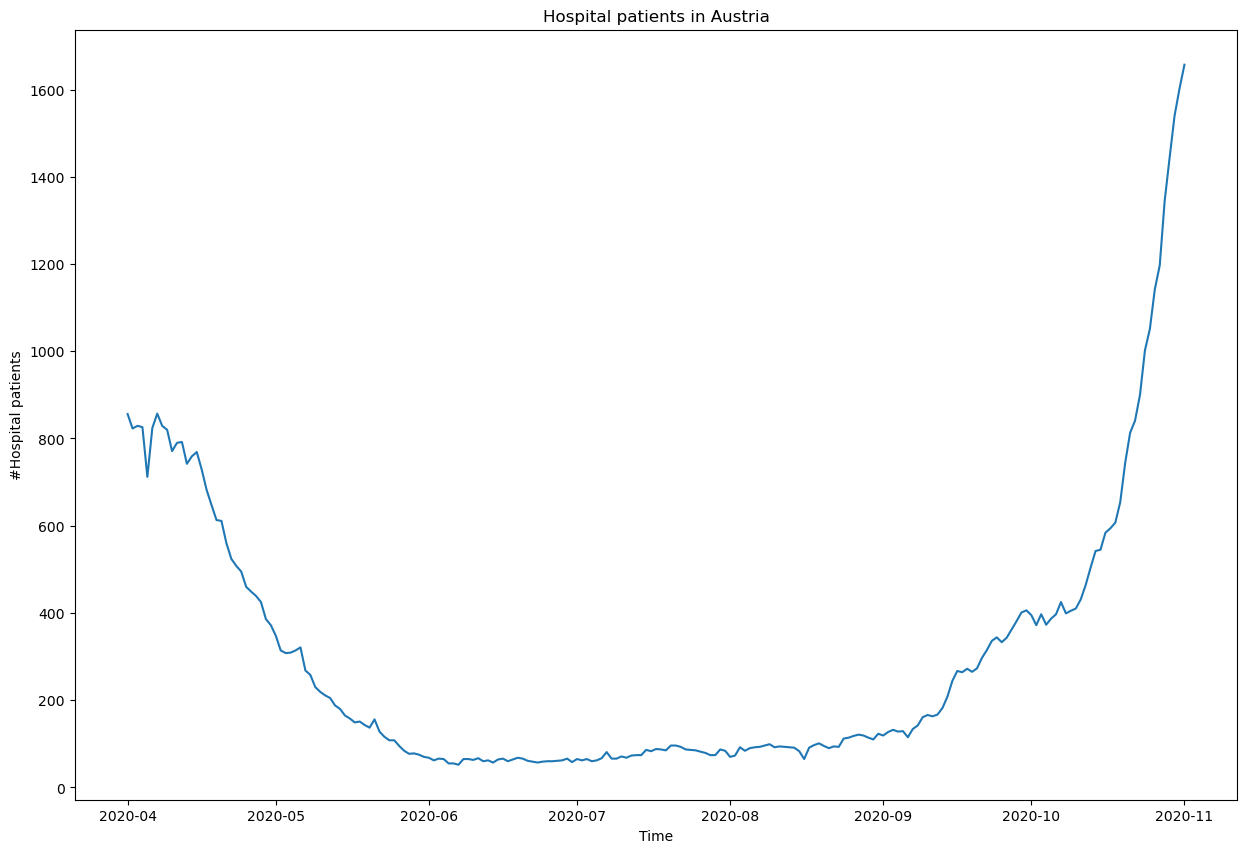

In [28]:
# creating a single line plot
plt.figure(figsize = (15,10)) 
plt.plot(data["Austria"]["date"], data["Austria"]["hosp_patients"] )
plt.xlabel('Time')
plt.ylabel("#Hospital patients")
plt.title('Hospital patients in Austria')

plt.show()

This looks like a proper line plot for me! 📈 
Note that in the last line we used `plt.show()` to show our plot. In most IPython Environments (like jupyter lab or if we open the Notebook in Visual Studio Code) we don't actually need to use `plt.show()`. Try out what happens if you comment the last line. However, if you are plotting inside a "normal" python script (suffix `.py`) and executing it from a terminal, you need to use `plt.show()`, otherwise it won't show. 


We can add multiple line plots over each other by just calling `plt.plot()` again, this time with the y-values for the `icu_patients` entries. Two make the two lines distingishuable, we can add a legend to the plot using `plt.legend()`. But before we do that we have to give each of our lines a label: This is done inside of the `plt.plot()` function. 

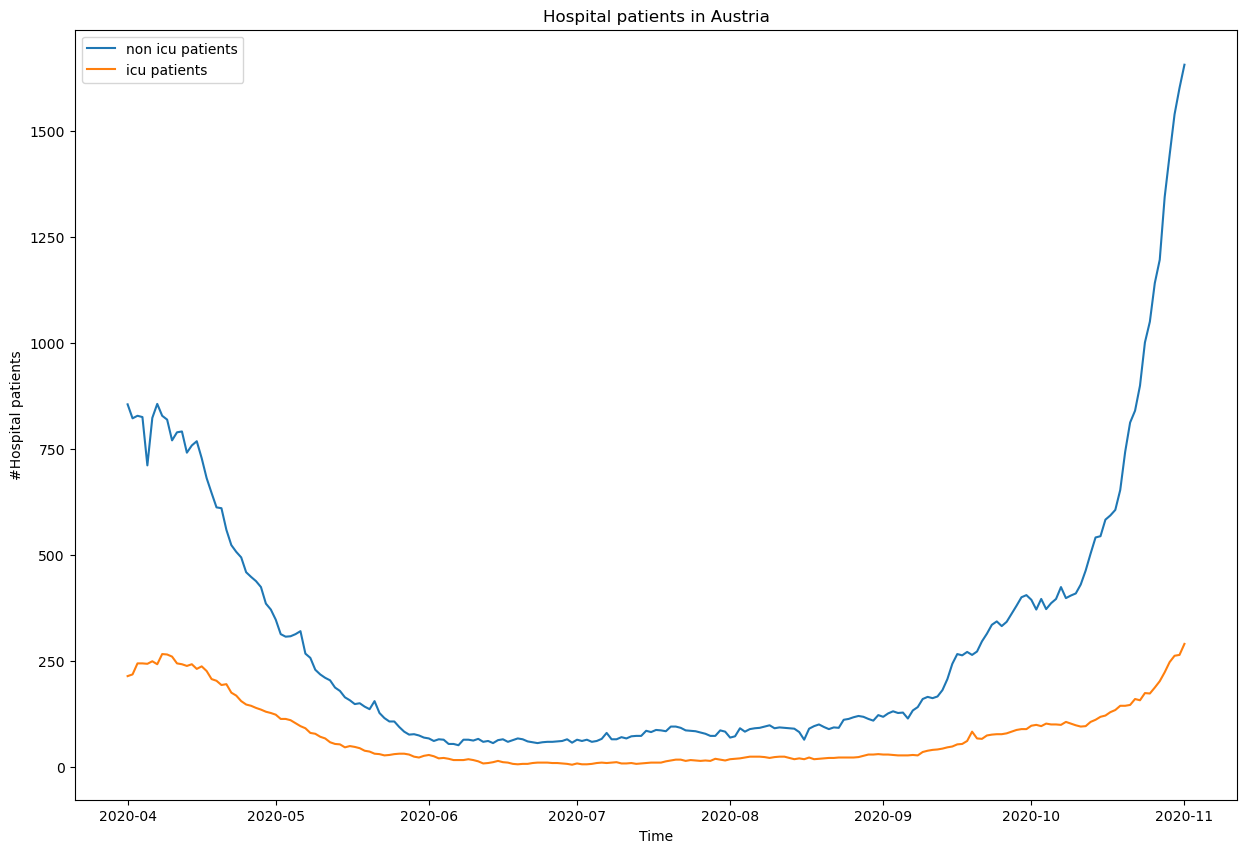

In [29]:
# creating a plot with multiple lines
plt.figure(figsize = (15,10))
plt.plot(data["Austria"]["date"], data["Austria"]["hosp_patients"], label='non icu patients')
plt.plot(data["Austria"]["date"], data["Austria"]["icu_patients"], label='icu patients')

plt.xlabel('Time')
plt.ylabel("#Hospital patients")
plt.title('Hospital patients in Austria')
plt.legend()

plt.show()

### Subplots
If we want to display two lines side-by-side rather than in the same set of x- and y-axes, subplots are a good way to do that.  
They can be designed in many different ways. A layout has rows and columns of subplots.
This is given as follows: `plt.subplot(num_rows, num_cols, index)`
So every time we call `plt.subplot` we have to define the number of rows and the number of columns for the plot. The last parameter is the index which defines the location of the subplot on the canvas. You might recognize this syntax from MATLAB. In the "fancy plotting" section we will also look at the `plt.subplots` package which is way more pythonic, so bear with us! 

The following figure has two subplots split into 1 row and 2 columns.  

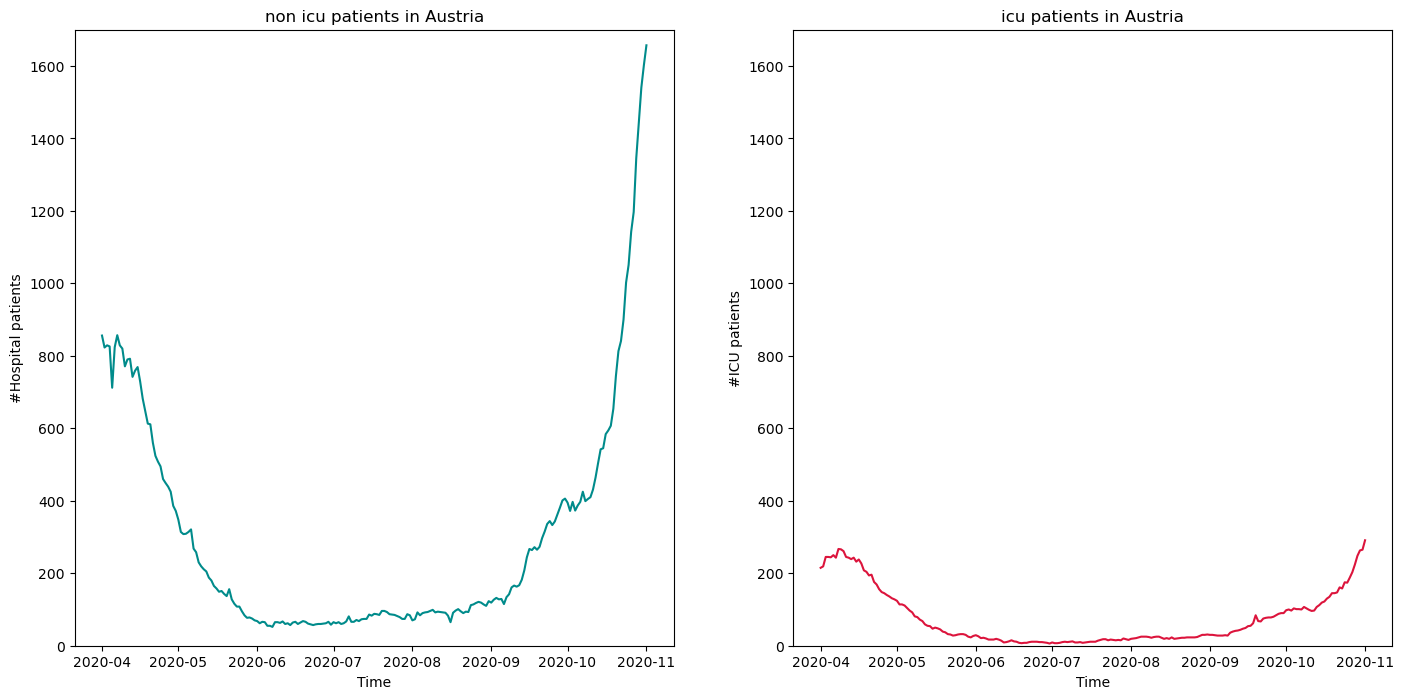

In [30]:
plt.figure(figsize = (17,8))

plt.subplot(1,2,1)
plt.plot(data["Austria"]["date"], data["Austria"]["hosp_patients"], color='DarkCyan')
plt.xlabel('Time')
plt.ylabel("#Hospital patients")
plt.ylim([0, 1700]) # if you use subplots, defining a y-limit makes them more comparable
plt.title('non icu patients in Austria')

plt.subplot(1,2,2)
plt.plot(data["Austria"]["date"], data["Austria"]["icu_patients"], color='#DC143C')
plt.xlabel('Time')
plt.ylabel("#ICU patients")
plt.ylim([0, 1700])
plt.title('icu patients in Austria')

plt.show()

### Linedesigns

To modify lines, matplotlib offers many different Linestyles.   
The `plot()` function can accept parameters to set the color(`color`), linestyle(`linestyle`), width(`linewidth`) and marker(`marker`). 

##### `color`
Color  values can be [HTML color names](https://www.w3schools.com/colors/colors_names.asp) or [HEX codes](https://www.w3schools.com/colors/colors_picker.asp) . Also, matplotlib has it's own list of named colors, which can be seen below. 

![Matplotlib Base Colors](https://matplotlib.org/stable/_images/sphx_glr_named_colors_001.png)
![Matplotlib CSS Colors](https://matplotlib.org/stable/_images/sphx_glr_named_colors_003.png)

##### `linewidth`

Linewidth sets the line width in points. By default, the `linewidth` is 1. The ´linewidth´ can be any float number smaller and bigger than 1, e.g. 7 or 0.25.


##### `linestyle`
Line styles can be dashed(`'--'`) or dotted(`':'`). You can also set `linewidth` to `"solid"`, `"dashed"` or `"dotted"`. Those linestyles are named, possible values are strings. 


|linestyle  | description |
| ------ | ------ |
| `'-'` or `'solid'` | solid line |
|`'--'` or  `'dashed'`| dashed line |
|`'-.'` or  `'dashdot'` |  dash-dotted line |
|`':'` or `'dotted'` | dotted line |
|`'none'`, `'None'`, `' '`, or `''` |  draw nothing |


Also, a [dash tuple](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html) of the following form can be provided: (offset, onoffseq)
where `onoffseq` is an even length tuple of on and off in points. 

##### `marker`
Markers can be circles(`'o'`), squares(`'s'`), stars(`'*'`) [and maaaaany mooore .. ](https://matplotlib.org/stable/api/markers_api.html). ⭐️

### Plotting with pandas

Pandas has built-in plotting functions that makes use of matplotlib! 🥳🐼

In [31]:
import pandas as pd

This time, we will read the data directly from the web using pandas.

In [32]:
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

Now we will plot data directly from our DataFrame `df`:

<AxesSubplot:title={'center':'Hospital Cases in Austria over time'}, xlabel='date'>

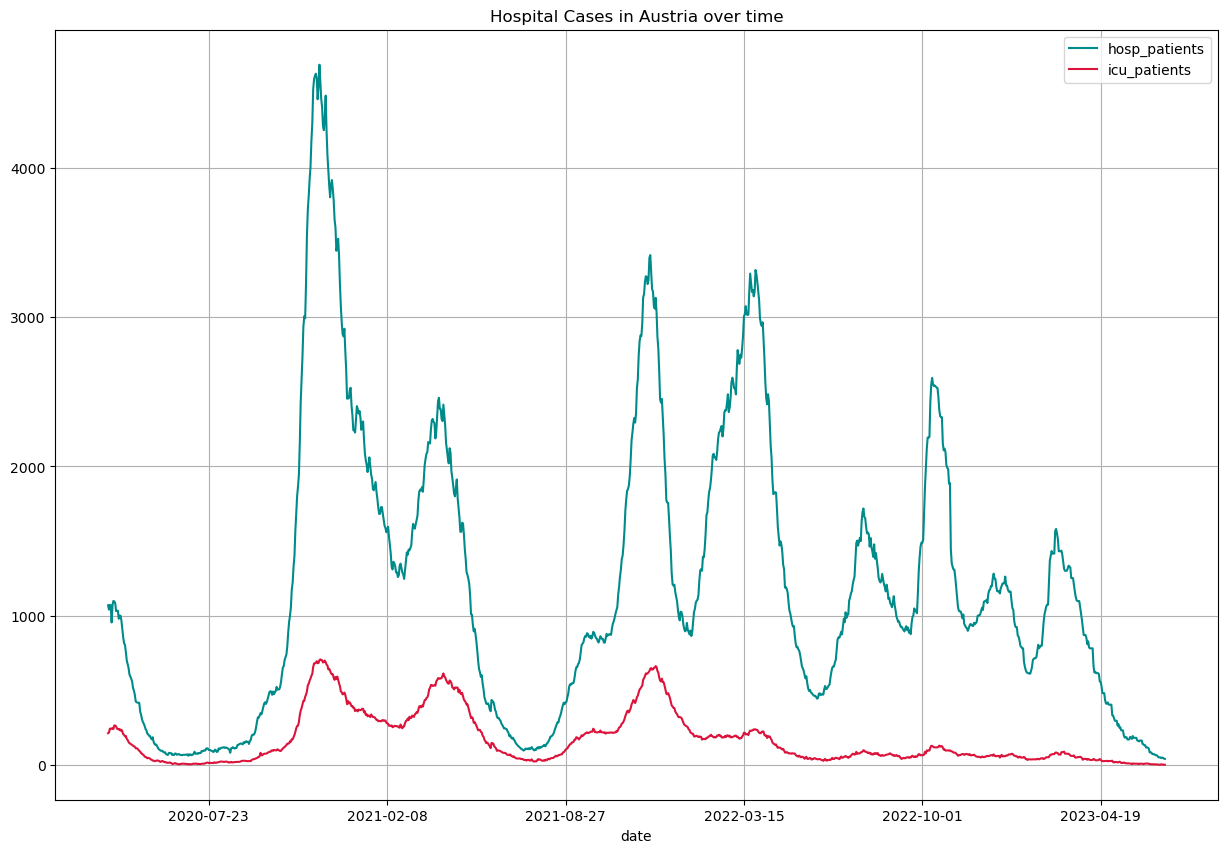

In [33]:
data_AT = df.loc[df.location == 'Austria']
data_AT.plot('date', ['hosp_patients', 'icu_patients'], color=['DarkCyan', '#DC143C'],
             figsize=(15, 10), grid=True, title="Hospital Cases in Austria over time")

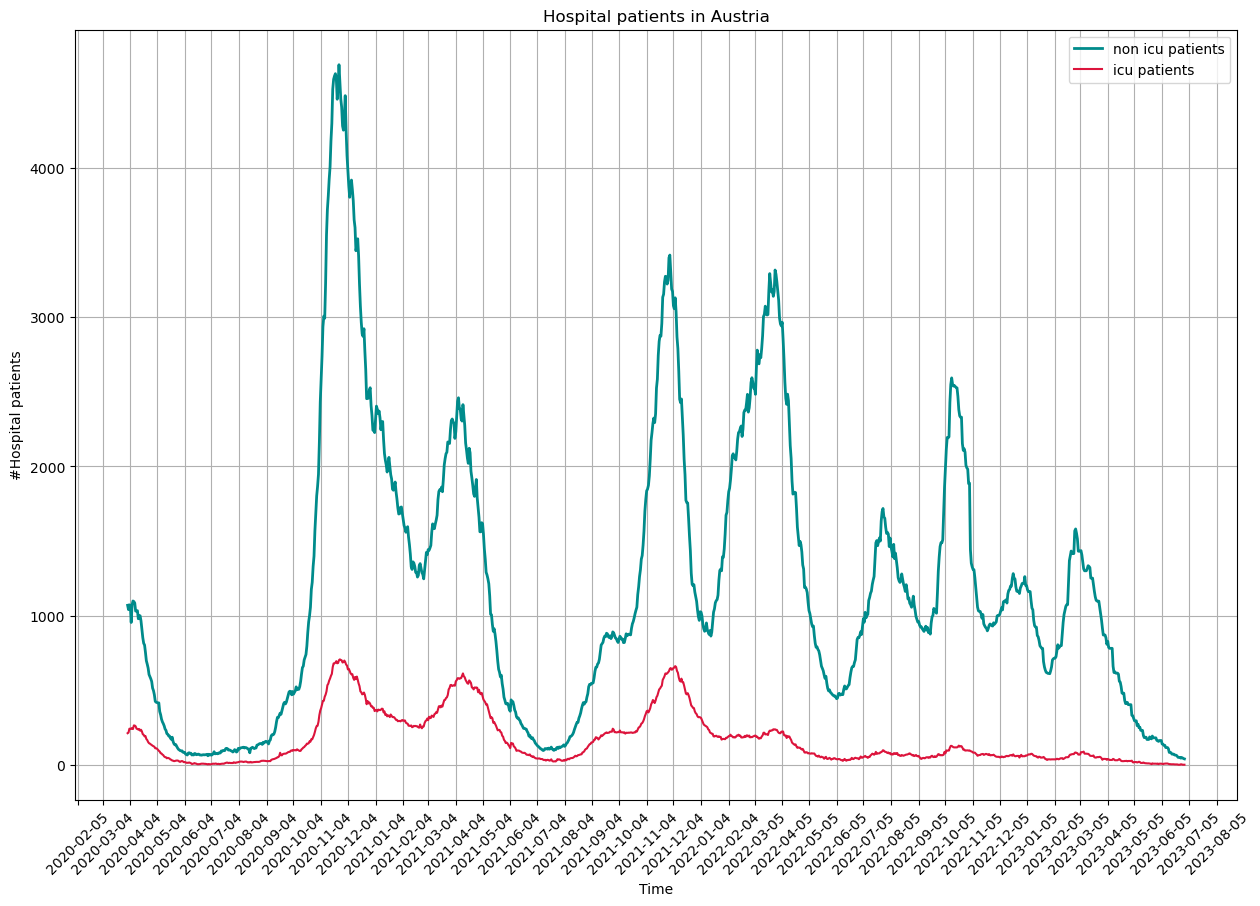

In [34]:
import matplotlib.dates as mdates # we use this to space our date-xticks

plt.figure(figsize = (15,10))

time_axis = df.loc[df.location == "Austria", "date"]
hosp_patients = df.loc[df.location == "Austria", "hosp_patients"]
icu_patients = df.loc[df.location == "Austria", "icu_patients"]

plt.plot(time_axis, hosp_patients, color = 'DarkCyan', linewidth = 2)
plt.plot(time_axis, icu_patients, color= '#DC143C')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.ylabel("#Hospital patients")
plt.title('Hospital patients in Austria')
plt.legend(['non icu patients', 'icu patients'])
plt.grid()
plt.show()

### Some fancy plotting 

If you want to try many other features of matplotlib and you want to get inspired, just click here:

https://matplotlib.org/gallery/index.html 

In this example we want to look at the histogram of two-dimensional data that follows a gaussian distribution. To get the gaussian data we will import the package `numpy`.

In [35]:
import numpy as np

np.random.seed(42)

data_2 = np.random.randn(2, 1000)
print(type(data_2))

x_4 = data_2[0]
y_4 = data_2[1]

<class 'numpy.ndarray'>


Note that instead of the subplot-example above where we used the `plt.subplot` function, we now use `plt.subplots`. 
We pass the number of rows and the number of columns as positional arguments to the function and can also define the `figsize`. It then returns a figure object and a tuple containing "axis-objects" that we can access like in a matrix. Note that the syntax for axis-objects (for example for setting the x-label, title, ...) is a little different to the normal `plt` environment.

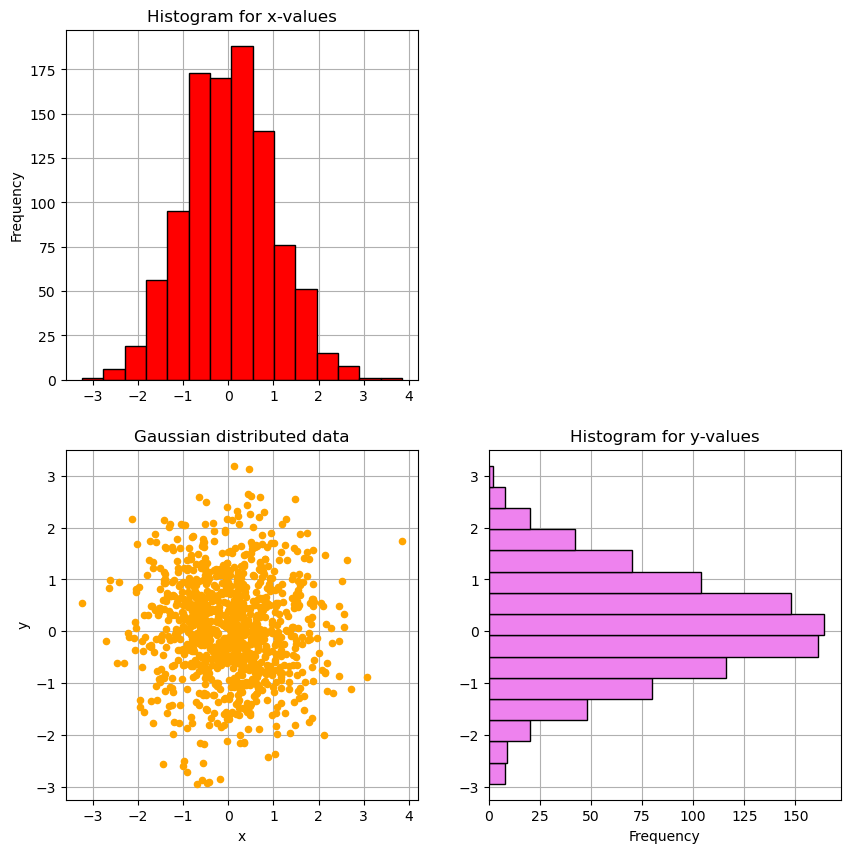

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# 2D gaussian distributed data
axes[1, 0].scatter(x_4, y_4, color="orange", s=20) # scatter plot
axes[1, 0].set_xlabel("x") 
axes[1, 0].set_ylabel("y")
axes[1, 0].set_title("Gaussian distributed data")
axes[1, 0].set_axisbelow(True) # set grid behind the data points
axes[1, 0].grid()

axes[0, 0].hist(x_4, bins=15, edgecolor="black", color='red')
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].set_title("Histogram for x-values")
axes[0, 0].set_axisbelow(True) # set grid behind the data points
axes[0, 0].grid()

axes[0, 1].axis('off') # this deletes the second subplot

axes[1, 1].hist(y_4, bins=15, edgecolor="black", color='violet', orientation='horizontal')
axes[1, 1].set_xlabel("Frequency")
axes[1, 1].set_title("Histogram for y-values")
axes[1, 1].set_axisbelow(True) # set grid behind the data points
axes[1, 1].grid()

plt.show()

# NetworkX
NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. [Here](https://networkx.org/documentation/stable/tutorial.html) is a written tutorial of the basics of the library.  
[This video tutorial (8min)](https://www.youtube.com/watch?v=flwcAf1_1RU) covers the basic usage of networkx.


### Installation

NetworkX is an external package which is not included in the python standard library so you have to install it using pip.

If you have a windows machine, use
```
pip install networkx
```


If your computer runs on macOS or Linux, type
```
pip3 install networkx
```

Or you can execute this cell:

In [37]:
! pip install networkx


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Now we need to import the package like this:

In [38]:
import networkx as nx

Now lets start with networkx, we first create an emty graph. By definition, a Graph is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.

In [39]:
G = nx.Graph()

The graph G can be grown in several ways. You can add one node at a time:

In [40]:
G.add_node(1)

or add nodes from any iterable container, such as a list

In [41]:
G.add_nodes_from([2, 3])

You can also add nodes along with node attributes if your container yields 2-tuples of the form (node, node_attribute_dict):

In [42]:
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

You can also add node attributes by using `add_node`, `add_nodes_from` or `G.nodes`

In [43]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]
{'time': '5pm'}
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 2: {}, 3: {'time': '2pm'}, 4: {'color': 'red'}, 5: {'color': 'green'}})

Note that adding a node to G.nodes does not add it to the graph, use `G.add_node()` to add new nodes.

The Graph can also be grown by adding edges. You can one edge at a time:

In [44]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

or you can add many adges by a list of edges. Note that the adges are always defined by a tuple of the nodes which should be connected by the edge:


In [45]:
G.add_edges_from([(1, 2), (1, 3)])

You can also add edge attributes with `add_edge` and `add_edges_from` as follows:

In [46]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])

You can look at the number of edges and number of nodes as following:

In [47]:
print(G.number_of_edges())
print(G.number_of_nodes())

5
5


Now lets do some ploting and visualizing a graph. First we create a new graph from a predefined dataset ([petersen graph](https://de.wikipedia.org/wiki/Petersen-Graph#:~:text=Der%20Petersen%2DGraph%20(benannt%20nach,3%2C3%2C3).)). For this we use the networkx drawing module. There are different ways to draw a graph and networkx already defines a lot of them. See [here](https://networkx.org/documentation/stable/reference/drawing.html) for more information.

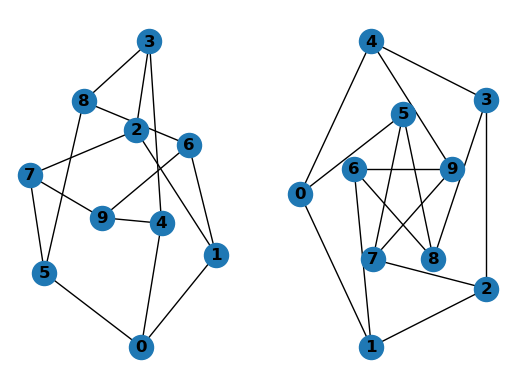

In [48]:
import matplotlib.pyplot as plt # we also need matplotlib for plotting
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

For more information there is a great Tutorial [here](https://networkx.org/nx-guides/content/exploratory_notebooks/facebook_notebook.html) which goes in more detail with analyzing the graph.

# twarc
twarc is a Python package for using the twitter API. [Here](https://twarc-project.readthedocs.io/en/latest/twarc2_en_us/) is more information about the library.

For using twarc you need a twitter account. [Here](https://scholarslab.github.io/learn-twarc/02-twitter-setup.html) is a Tutorial how to setup your twitter account for using twarc with it.


### Installation

twarc is an external package which is not included in the python standard library so you have to install it using pip.

If you have a windows machine, use
```
pip install twarc
```


If your computer runs on macOS or Linux, type
```
pip3 install twarc
```

Or you can execute this cell:

In [49]:
! pip install twarc
! pip install tqdm # needed later for some nice progress bars


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Now we need to import the package like this:

In [50]:
from twarc import Twarc2

First of all you need to create a `Twarc2` instance with your credentials. See [here](https://scholarslab.github.io/learn-twarc/02-twitter-setup.html#accessing-keys-and-tokens) how to get your bearer token (You can generate one in the Key and Tokens section of your app). After that you will be able to access the Twitter API with `twarc`.

In [51]:
bearer_token = "XXX" # replace the XXX with your bearer token
twarc_client = Twarc2(bearer_token=bearer_token)

 Now lets use the twitter API. For example, we can get basic information on the Twitter account of the New York Times:

In [52]:
#print(next(twarc_client.user_lookup(["nytimes"], usernames=True)))

This returns a `dictionary` with two keys. One is the `__twarc` key where the value is some information about the `twarc` call. The second and more important key is the `data` key. The value here is a list of dictionaries, where each dictionary contains the data for one user. This contains for example, the username, the id, location and other information, just look through the dictionary.

You can also get a list of users by a twitter user list id. For example when using following users id (34179516) we can use the method [`list_members`](https://twarc-project.readthedocs.io/en/latest/api/client2/#twarc.client2.Twarc2.list_members) of `twarc` to get all user information in the list.  
Pandas method [`json_normalize`](https://pandas.pydata.org/docs/reference/api/pandas.json_normalize.html) will help you to save the json results from twarc in a flat table, since the data may not be flat, it is returned as a json from the twitter API.

In [53]:
# users = []
# for user in twarc_client.list_members(list_id = 34179516):
#     users.append(user)
# users = pd.json_normalize(users, record_path=['data'])
# users

Next we want to get the timeline of the users, more specific we want to get the last 100 tweets of each user and the information about the tweets. For this we can use `twarc`'s [`timeline`](https://twarc-project.readthedocs.io/en/latest/api/client2/#twarc.client2.Twarc2.timeline) method. This returns a generator where each element contains all the tweets on one page. The twitter API contains a maximum of 100 tweets per page. If you want to extract the last >100 tweets you need to extract the tweets from the first and following pages (or the first and following elements in the timeline generator).  
For this you iterate over all users and then call the `timeline` method (make sure you set `max_results` to 100). Now you can use pythons [`next`](https://docs.python.org/3/library/functions.html#next) function to get the next element in the iterator (The first 100 tweets). To get the second 100 tweets (100 - 200 tweets) you just have to call `next` again and so on.   

In [54]:
# import tqdm # we use tqdm for some nice progress bars
# timeline = []
# # iterate with tqdm to show progress
# for userID in tqdm.tqdm(users.id.values[:20]): # Only geting data from the first 10 users so it does not take too long
#     data = twarc_client.timeline(user=userID, max_results=100)
#     timeline.append(next(data))
#     # if you want to get more tweets, you can use the next function call here
# timeline

Notice you you may run into the [rate limit](https://developer.twitter.com/en/docs/twitter-api/rate-limits) of the Twitter API, you might have to wait up to 15 min to retrieve more tweets. Twarc will wait and resume the request automatically and print a warning. So normally you would save the data to a csv file at the end, for example with pandas.

## Best practices

For third party modules don't exist really a best practice since there are a lot of different convensions. Most common convesions are with importing the modules, there is in most cases a common abbrevation for the module for example pandas gets imported as `pd`, while matplotlib gets imported as `plt`. We reccomend this but it is not needed to do.   

Therefore we do not include any best practices for these specific libraries but keep in mind the best practices from the basic python functionality and try to keep and use it here too (e.g. choose meaningfull variable names, watch indentation and so on)